In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Дано
f = lambda x, y : (y-x**4)**.5   # данная функция y'(x,y)
x0, y0 = -1, 1
b = 1
h = (b - x0) / 10

In [3]:
# Метод Эйлера
x, y = x0, y0               

x_all = []                  # Создаём пустые вектора, в которые 
y_all_eiler = []            # будем добавлять значения найденный x и y

while x <= b:
    x_all.append(x)         # Добавляем x в вектор x_all
    y_all_eiler.append(y)   # Добавляем y в вектор y_all_eiler
    y = y + h * f(x,y)      # Находим новый y
    x += h                  # Находим новый x

In [4]:
# Метод Рунгге-кутты 4-го порядка
x, y = x0, y0               

x_all = []                 # Создаём пустые вектора, в которые
y_all_rk = []              # будем добавлять значения найденный x и y

while x <= b:
    x_all.append(x)                 # Добавляем x в вектор x_all
    y_all_rk.append(y)              # Добавляем y в вектор y_all_rk
    K0 = f(x,y)                     # Расчёт коэффициентов
    K1 = f(x + h/2, y + K0*h/2) 
    K2 = f(x + h/2, y + K1*h/2)
    K3 = f(x + h, y + K2*h)
    y = y + h/6*(K0 + 2*K1 + 2*K2 + K3)   # Находим новый y
    x += h                                # Находим новый x

In [5]:
# Метод Адамса
x_all = [x0 + h*i for i in range(3)]         # Добавляем первые 3 узла
y_all_ad = y_all_rk[0:3]                     # Берём первые 3 значения y из метода Рунге-Кутта

x = x_all[-1] + h                            # В качестве значения x, с которого начинается цикл
y = y_all_rk[3]                              # примем значение 4 узла,
                                             # в качестве y - значение y в 4 узле метода РК
while x <=b:
    x_all.append(x)                          # Добавляем x в вектор x_all
    y_all_ad.append(y)                       # Добавляем y в вектор y_all_rk
    y = y_all_ad[-1] + h/24 * \
        (55*f(x_all[-1],y_all_ad[-1]) \
        -59*f(x_all[-2],y_all_ad[-2]) \
        +37*f(x_all[-3],y_all_ad[-3]) \
        -9*f(x_all[-4],y_all_ad[-4]))        # Находим новый y
    x += h                                   # Находим новый x

In [6]:
# Вывод таблицы
d = {'x': x_all, 
     'y (Метод Эйлера)': y_all_eiler, 
     'y (Метод Рунге-Кутты)': y_all_rk,
     'y (Метод Адамса)': y_all_ad}
pd.DataFrame(d)

x  y (Метод Эйлера)  y (Метод Рунге-Кутты)  y (Метод Адамса)
0  -1.000000e+00          1.000000               1.000000          1.000000
1  -8.000000e-01          1.000000               1.109624          1.109624
2  -6.000000e-01          1.153675               1.304322          1.304322
3  -4.000000e-01          1.356068               1.536590          1.536590
4  -2.000000e-01          1.586760               1.793680          1.825068
5   5.551115e-17          1.838566               2.071510          2.111049
6   2.000000e-01          2.109754               2.369342          2.410779
7   4.000000e-01          2.400143               2.686566          2.731986
8   6.000000e-01          2.708334               3.020293          3.069567
9   8.000000e-01          3.029503               3.363309          3.416205
10  1.000000e+00          3.353226               3.701590          3.758738

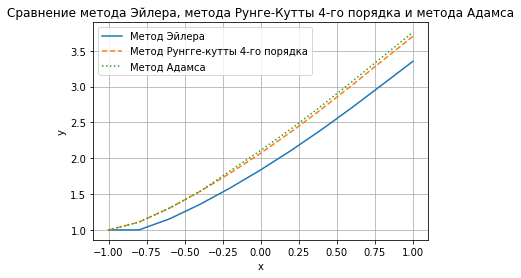

In [7]:
# Построение графиков
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение метода Эйлера, метода Рунге-Кутты 4-го порядка и метода Адамса')
plt.grid(True)
plt_eiler, = plt.plot(x_all, y_all_eiler)
plt_rk, = plt.plot(x_all, y_all_rk, '--')
plt_ad, = plt.plot(x_all, y_all_ad, ':')
plt.legend([plt_eiler, plt_rk, plt_ad], ['Метод Эйлера', 'Метод Рунгге-кутты 4-го порядка', 'Метод Адамса'])